In [ ]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies & Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
from matplotlib.pyplot import pie, axis, show

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Files to load
energy_contracts_to_load = "/content/drive/MyDrive/ResourcesUCB/clean_contracts.csv"
clean_indices_to_load = "/content/drive/MyDrive/ResourcesUCB/clean_indices.csv"
clean_prices_to_load = "/content/drive/MyDrive/ResourcesUCB/clean_prices.csv"
other_natural_gas_to_load = "/content/drive/MyDrive/ResourcesUCB/other_natural_gas_data_df.csv"
other_natural_gas_10_to_load = "/content/drive/MyDrive/ResourcesUCB/other_natural_gas_data_10_df.csv"
other_natural_gas_5_to_load = "/content/drive/MyDrive/ResourcesUCB/other_natural_gas_data_5_df.csv"

In [ ]:
# Read files & store in pandas DataFrame
energy_contracts_df = pd.read_csv(energy_contracts_to_load)
indices_df = pd.read_csv(clean_indices_to_load)
prices_df = pd.read_csv(clean_prices_to_load)
other_natural_gas_df = pd.read_csv(other_natural_gas_to_load)
other_natural_gas_10_df = pd.read_csv(other_natural_gas_10_to_load)
other_natural_gas_5_df = pd.read_csv(other_natural_gas_5_to_load)

In [ ]:
energy_contracts_df.head()

,total_obligated_amount,Month,product_or_service_code_description,naics_description,recipient_name,funding_sub_agency_name
0,10000.00,2016M09,GASES: COMPRESSED AND LIQUEFIED,NATURAL GAS LIQUID EXTRACTION,"AMERIGAS PROPANE, L.P.",DEPT OF THE NAVY
1,1384.98,2016M02,"MINERAL CONSTRUCTION MATERIALS, BULK",CONSTRUCTION SAND AND GRAVEL MINING,"BRAATEN SAND & GRAVEL, INC",FEDERAL PRISON SYSTEM
2,542491.46,2017M05,MAINTENANCE OF FUEL SUPPLY FACILITIES,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,"POND CONSTRUCTORS, INC",DEFENSE LOGISTICS AGENCY
3,21764.63,2016M03,OTHER QC/TEST/INSPECT- MISCELLANEOUS,CONSTRUCTION SAND AND GRAVEL MINING,MISCELLANEOUS FOREIGN AWARDEES,"STATE, DEPARTMENT OF"
4,256800.00,2020M12,"MINERAL CONSTRUCTION MATERIALS, BULK",OTHER CRUSHED AND BROKEN STONE MINING AND QUAR...,FOREIGN AWARDEES (UNDISCLOSED),DEPT OF THE ARMY


In [ ]:
indices_df.head()

,Month,Energy,Non_Energy,Agriculture,Agriculture_Beverages,Agriculture_Food,Agriculture_Oils_Meals,Agriculture_Grains,Agriculture_Other_Food,Raw_Materials,Raw_Materials_Timber,Raw_Materials_Other,Fertilizers,Metals_Minerals,Metals_Minerals_Base_Metals,Precious_Metals
0,2016M01,40.86,74.03,82.30,86.05,83.11,77.99,82.77,90.16,78.43,92.15,63.43,90.32,55.21,61.37,84.73
1,2016M02,42.84,74.60,82.53,84.82,83.82,79.84,82.61,90.14,78.26,92.24,62.96,80.30,57.68,63.63,92.31
2,2016M03,48.74,76.99,84.41,88.42,85.85,81.71,82.90,93.96,78.89,92.12,64.42,82.00,61.19,66.46,95.59
3,2016M04,52.28,78.83,86.89,89.81,88.46,86.97,84.31,94.19,81.60,93.21,68.90,81.36,62.00,66.70,96.30
4,2016M05,57.65,79.95,89.62,90.92,92.47,92.40,85.90,98.50,82.05,94.45,68.50,81.09,59.98,65.14,98.12


In [ ]:
prices_df.head()

,Month,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",Natural gas index,Cocoa,"Coffee, Arabica","Coffee, Robusta","Tea, avg 3 auctions","Tea, Colombo","Tea, Kolkata","Tea, Mombasa",Coconut oil,Groundnuts,Fish meal,Groundnut oil,Palm oil,Palm kernel oil,Soybeans,Soybean oil,Soybean meal,Rapeseed oil,Sunflower oil,Barley,Maize,Sorghum,"Rice, Thai 5%","Rice, Thai 25%","Rice, Thai A.1","Rice, Viet Namese 5%","Wheat, US SRW","Wheat, US HRW","Banana, Europe","Banana, US",Orange,Beef,"Meat, chicken","Meat, sheep","Shrimps, Mexican","Sugar, EU","Sugar, US","Sugar, world","Tobacco, US import u.v.","Logs, Cameroon","Logs, Malaysian","Sawnwood, Cameroon","Sawnwood, Malaysian",Plywood,"Cotton, A Index","Rubber, TSR20","Rubber, SGP/MYS",Phosphate rock,DAP,TSP,Urea,Potassium chloride,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,2016M01,29.78,30.80,27.00,31.54,49.02,49.09,2.27,4.40,8.40,54.22,2.95,3.20,1.65,2.55,2.85,2.08,2.72,1152.00,1307.83,1498.60,1359.90,611.63,895.63,373.08,736.03,336.48,781.35,885.35,118.50,161.03,164.91,369.0,361,366.19,364.91,191.73,193.27,0.86,1.04,0.69,3.63,1.85,4.54,10.47,0.35,0.57,0.31,4730.96,380.21,251.76,690.70,785.62,461.78,1.52,1.08,1.23,122.60,327.13,334.00,233.88,301.5,1481.10,41.88,4471.79,1646.20,13808.08,8507.29,1520.36,1097.91,855.25,14.11
1,2016M02,31.03,33.20,29.50,30.39,50.27,50.33,1.96,3.97,8.56,48.43,2.92,3.26,1.63,2.35,2.83,1.75,2.48,1218.93,1280.00,1511.99,1317.26,679.17,986.90,373.75,767.24,323.29,779.88,898.19,114.82,159.68,164.91,384.0,374,377.38,360.13,188.43,187.03,0.93,1.05,0.69,3.86,1.77,4.51,10.80,0.36,0.56,0.29,4670.33,388.43,259.34,685.86,780.11,475.70,1.47,1.10,1.27,114.50,326.00,286.25,191.88,301.5,1531.26,46.83,4598.62,1765.75,15610.14,8298.50,1709.85,1199.50,919.35,15.17
2,2016M03,37.34,39.07,35.18,37.77,52.21,52.57,1.70,3.91,7.74,44.49,3.07,3.47,1.67,2.31,2.87,1.77,2.30,1440.48,1280.00,1443.58,1300.73,715.95,1210.60,380.97,765.61,319.13,766.26,859.19,112.99,159.14,160.50,384.0,375,374.90,360.20,189.69,191.07,0.94,1.01,0.68,4.03,1.85,4.48,10.67,0.36,0.58,0.34,4569.68,388.89,263.62,681.40,775.04,483.53,1.44,1.28,1.46,114.50,338.13,291.25,201.75,301.5,1531.01,56.20,4953.80,1802.19,16897.60,8717.25,1801.69,1245.14,967.73,15.47
3,2016M04,40.75,42.25,39.04,40.96,50.69,52.35,1.90,3.97,6.82,46.63,3.08,3.40,1.77,2.54,2.99,2.51,2.11,1580.95,1294.47,1474.33,1314.38,775.00,1299.05,395.14,794.13,346.19,808.51,875.95,112.53,164.41,162.26,395.0,386,383.53,371.00,192.76,187.39,0.94,0.99,0.71,3.96,1.93,4.56,10.53,0.37,0.62,0.34,4625.00,396.73,271.70,685.76,780.00,498.36,1.53,1.49,1.71,114.13,330.50,295.00,196.25,301.5,1571.23,60.92,4872.74,1732.27,17032.71,8878.86,1855.37,1242.26,994.19,16.36
4,2016M05,45.94,47.13,43.95,46.73,51.31,54.24,1.92,4.33,6.27,48.17,3.10,3.42,1.85,2.57,3.08,2.43,2.21,1439.50,1200.00,1500.81,1322.77,753.42,1218.25,422.55,795.64,421.64,805.59,881.00,112.07,168.96,158.51,433.0,415,414.38,377.31,189.85,171.96,0.93,0.99,0.76,4.04,2.06,4.71,10.47,0.37,0.60,0.38,4680.36,395.82,273.27,696.35,792.05,501.24,1.55,1.36,1.63,110.50,313.50,295.00,198.38,301.5,1550.63,55.13,4694.54,1707.80,16706.95,8660.35,1869.03,1260.95,1035.86,16.95


In [ ]:
# look to compare clean_contracts.csv to clean_prices.csv
# combine data into a single dataset
natural_gas_data_df = pd.merge(energy_contracts_df, prices_df, how="left", on=["Month", "Month"])
pd.options.display.max_columns = None
natural_gas_data_df

,total_obligated_amount,Month,product_or_service_code_description,naics_description,recipient_name,funding_sub_agency_name,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",Natural gas index,Cocoa,"Coffee, Arabica","Coffee, Robusta","Tea, avg 3 auctions","Tea, Colombo","Tea, Kolkata","Tea, Mombasa",Coconut oil,Groundnuts,Fish meal,Groundnut oil,Palm oil,Palm kernel oil,Soybeans,Soybean oil,Soybean meal,Rapeseed oil,Sunflower oil,Barley,Maize,Sorghum,"Rice, Thai 5%","Rice, Thai 25%","Rice, Thai A.1","Rice, Viet Namese 5%","Wheat, US SRW","Wheat, US HRW","Banana, Europe","Banana, US",Orange,Beef,"Meat, chicken","Meat, sheep","Shrimps, Mexican","Sugar, EU","Sugar, US","Sugar, world","Tobacco, US import u.v.","Logs, Cameroon","Logs, Malaysian","Sawnwood, Cameroon","Sawnwood, Malaysian",Plywood,"Cotton, A Index","Rubber, TSR20","Rubber, SGP/MYS",Phosphate rock,DAP,TSP,Urea,Potassium chloride,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,10000.00,2016M09,GASES: COMPRESSED AND LIQUEFIED,NATURAL GAS LIQUID EXTRACTION,"AMERIGAS PROPANE, L.P.",DEPT OF THE NAVY,45.04,46.19,43.74,45.20,72.72,68.33,2.97,4.25,7.54,61.38,2.88,3.89,2.14,2.79,3.60,2.44,2.33,1557.39,1550.00,1536.80,1433.00,797.85,1443.86,403.53,837.21,368.05,849.65,865.73,89.56,148.43,145.39,384.0,378,365.27,342.73,157.56,150.65,0.91,1.00,1.05,4.12,1.70,4.83,11.88,0.37,0.62,0.47,4957.02,392.42,292.15,630.04,716.62,535.87,1.72,1.36,1.57,109.00,320.00,287.00,187.30,206.5,1592.36,57.79,4722.20,1947.64,19499.52,10191.78,2292.31,1326.61,1046.71,19.36
1,1384.98,2016M02,"MINERAL CONSTRUCTION MATERIALS, BULK",CONSTRUCTION SAND AND GRAVEL MINING,"BRAATEN SAND & GRAVEL, INC",FEDERAL PRISON SYSTEM,31.03,33.20,29.50,30.39,50.27,50.33,1.96,3.97,8.56,48.43,2.92,3.26,1.63,2.35,2.83,1.75,2.48,1218.93,1280.00,1511.99,1317.26,679.17,986.90,373.75,767.24,323.29,779.88,898.19,114.82,159.68,164.91,384.0,374,377.38,360.13,188.43,187.03,0.93,1.05,0.69,3.86,1.77,4.51,10.80,0.36,0.56,0.29,4670.33,388.43,259.34,685.86,780.11,475.70,1.47,1.10,1.27,114.50,326.00,286.25,191.88,301.5,1531.26,46.83,4598.62,1765.75,15610.14,8298.50,1709.85,1199.50,919.35,15.17
2,542491.46,2017M05,MAINTENANCE OF FUEL SUPPLY FACILITIES,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,"POND CONSTRUCTORS, INC",DEFENSE LOGISTICS AGENCY,49.89,50.87,50.31,48.50,74.42,74.41,3.12,5.06,9.10,68.16,1.98,3.31,2.17,3.20,4.02,2.63,2.94,1719.29,1593.04,1330.30,1453.05,762.75,1098.57,389.72,825.06,344.35,842.05,795.00,94.16,158.59,159.95,421.0,399,394.95,345.00,174.97,180.41,0.91,1.09,0.76,4.60,2.33,5.40,14.29,0.36,0.63,0.35,4582.06,386.75,265.28,619.40,704.52,486.59,1.95,1.53,2.10,92.50,309.25,275.00,178.75,206.5,1913.02,62.43,5599.56,2125.11,20200.33,9155.12,2590.21,1246.04,930.27,16.75
3,21764.63,2016M03,OTHER QC/TEST/INSPECT- MISCELLANEOUS,CONSTRUCTION SAND AND GRAVEL MINING,MISCELLANEOUS FOREIGN AWARDEES,"STATE, DEPARTMENT OF",37.34,39.07,35.18,37.77,52.21,52.57,1.70,3.91,7.74,44.49,3.07,3.47,1.67,2.31,2.87,1.77,2.30,1440.48,1280.00,1443.58,1300.73,715.95,1210.60,380.97,765.61,319.13,766.26,859.19,112.99,159.14,160.50,384.0,375,374.90,360.20,189.69,191.07,0.94,1.01,0.68,4.03,1.85,4.48,10.67,0.36,0.58,0.34,4569.68,388.89,263.62,681.40,775.04,483.53,1.44,1.28,1.46,114.50,338.13,291.25,201.75,301.5,1531.01,56.20,4953.80,1802.19,16897.60,8717.25,1801.69,1245.14,967.73,15.47
4,256800.00,2020M12,"MINERAL CONSTRUCTION MATERIALS, BULK",OTHER CRUSHED AND BROKEN STONE MINING AND QUAR...,FOREIGN AWARDEES (UNDISCLOSED),DEPT OF THE ARMY,48.73,49.87,49.26,47.05,83.03,85.18,2.54,5.86,7.66,63.86,2.41,3.48,1.59,2.65,3.41,2.60,1.94,1464.96,1937.50,1497.69,1977.17,1016.37,1224.87,510.94,1026.20,494.98,1097.63,1170.02,NaN,198.77,NaN,520.0,508,496.55,477.39,251.15,268.55,0.92,1.15,0.64,4.40,1.81,NaN,11.68,0.40,0.63,0.31,4200.40,425.85,286.86,643.93,732.43,526.16,1.79,1.57,2.33,83.33,38

In [ ]:
# get column names from data set
print(natural_gas_data_df.columns)

Index(['total_obligated_amount', 'Month',
       'product_or_service_code_description', 'naics_description',
       'recipient_name', 'funding_sub_agency_name', 'Crude oil, average',
       'Crude oil, Brent', 'Crude oil, Dubai', 'Crude oil, WTI',
       'Coal, Australian', 'Coal, South African **', 'Natural gas, US',
       'Natural gas, Europe **', 'Liquefied natural gas, Japan',
       'Natural gas index', 'Cocoa', 'Coffee, Arabica', 'Coffee, Robusta',
       'Tea, avg 3 auctions', 'Tea, Colombo', 'Tea, Kolkata', 'Tea, Mombasa',
       'Coconut oil', 'Groundnuts', 'Fish meal', 'Groundnut oil', 'Palm oil',
       'Palm kernel oil', 'Soybeans', 'Soybean oil', 'Soybean meal',
       'Rapeseed oil', 'Sunflower oil', 'Barley', 'Maize', 'Sorghum',
       'Rice, Thai 5% ', 'Rice, Thai 25% ', 'Rice, Thai A.1',
       'Rice, Viet Namese 5%', 'Wheat, US SRW', 'Wheat, US HRW',
       'Banana, Europe', 'Banana, US', 'Orange', 'Beef', 'Meat, chicken',
       'Meat, sheep', 'Shrimps, Mexican', 'S

In [ ]:
# make summary DataFrame to reduce columns
# columns ["Natural gas, US", ]
natural_gas_data_summary_df = pd.DataFrame({})

# naics stands for North American Industry Classification System

# keep specific columns
natural_gas_data_df1 = natural_gas_data_df[['Month','naics_description','product_or_service_code_description','total_obligated_amount','recipient_name','funding_sub_agency_name','Natural gas, US']]
natural_gas_data_df1

,Month,naics_description,product_or_service_code_description,total_obligated_amount,recipient_name,funding_sub_agency_name,"Natural gas, US"
0,2016M09,NATURAL GAS LIQUID EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,10000.00,"AMERIGAS PROPANE, L.P.",DEPT OF THE NAVY,2.97
1,2016M02,CONSTRUCTION SAND AND GRAVEL MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",1384.98,"BRAATEN SAND & GRAVEL, INC",FEDERAL PRISON SYSTEM,1.96
2,2017M05,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,MAINTENANCE OF FUEL SUPPLY FACILITIES,542491.46,"POND CONSTRUCTORS, INC",DEFENSE LOGISTICS AGENCY,3.12
3,2016M03,CONSTRUCTION SAND AND GRAVEL MINING,OTHER QC/TEST/INSPECT- MISCELLANEOUS,21764.63,MISCELLANEOUS FOREIGN AWARDEES,"STATE, DEPARTMENT OF",1.70
4,2020M12,OTHER CRUSHED AND BROKEN STONE MINING AND QUAR...,"MINERAL CONSTRUCTION MATERIALS, BULK",256800.00,FOREIGN AWARDEES (UNDISCLOSED),DEPT OF THE ARMY,2.54
...,...,...,...,...,...,...,...
10575,2018M09,OTHER CRUSHED AND BROKEN STONE MINING AND QUAR...,"MINERAL CONSTRUCTION MATERIALS, BULK",451.80,GREEN DREAM INTERNATIONAL LLC,DEPT OF THE ARMY,2.98
10576,2021M05,CONSTRUCTION SAND AND GRAVEL MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",99950.00,"HAT CREEK CONSTRUCTION & MATERIALS, INC.",FOREST SERVICE,2.89
10577,2021M08,PHOSPHATE ROCK MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",29982.00,"DOUBLE A HAULING, INC.",U.S. FISH AND WILDLIFE SERVICE,4.05
10578,2016M12,SUPPORT ACTIVITIES FOR COAL MINING,"NAILS, MACHINE KEYS, AND PINS",138.21,"VIRGINIA ENERGY & LIGHTING, LLC",DEFENSE LOGISTICS AGENCY,3.58


In [ ]:
# unique values from naics_description column
print(pd.unique(natural_gas_data_df1['naics_description']))

['NATURAL GAS LIQUID EXTRACTION' 'CONSTRUCTION SAND AND GRAVEL MINING'
 'SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS'
 'OTHER CRUSHED AND BROKEN STONE MINING AND QUARRYING'
 'SUPPORT ACTIVITIES FOR COAL MINING'
 'CRUDE PETROLEUM AND NATURAL GAS EXTRACTION'
 'CRUSHED AND BROKEN LIMESTONE MINING AND QUARRYING'
 'NATURAL GAS EXTRACTION'
 'SUPPORT ACTIVITIES FOR NONMETALLIC MINERALS (EXCEPT FUELS)'
 'OTHER CHEMICAL AND FERTILIZER MINERAL MINING'
 'POTASH, SODA, AND BORATE MINERAL MINING'
 'COPPER ORE AND NICKEL ORE MINING'
 'CRUSHED AND BROKEN GRANITE MINING AND QUARRYING'
 'ALL OTHER NONMETALLIC MINERAL MINING'
 'DIMENSION STONE MINING AND QUARRYING' 'ALL OTHER METAL ORE MINING'
 'BITUMINOUS COAL UNDERGROUND MINING' 'PHOSPHATE ROCK MINING'
 'DRILLING OIL AND GAS WELLS' 'GOLD ORE MINING'
 'CRUDE PETROLEUM EXTRACTION' 'INDUSTRIAL SAND MINING'
 'SUPPORT ACTIVITIES FOR METAL MINING'
 'BITUMINOUS COAL AND LIGNITE SURFACE MINING'
 'CLAY AND CERAMIC AND REFRACTORY MINERALS MINING'
 'KAOLIN AND

In [ ]:
# Relevant NAICS descriptions
# 'CRUDE PETROLEUM AND NATURAL GAS EXTRACTION' 'NATURAL GAS LIQUID EXTRACTION' 'SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS' 'NATURAL GAS EXTRACTION'

In [ ]:
print(natural_gas_data_df1.columns)

Index(['Month', 'naics_description', 'product_or_service_code_description',
       'total_obligated_amount', 'recipient_name', 'funding_sub_agency_name',
       'Natural gas, US'],
      dtype='object')


In [ ]:
extract_values = ['CRUDE PETROLEUM AND NATURAL GAS EXTRACTION', 'NATURAL GAS LIQUID EXTRACTION', 'SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS', 'NATURAL GAS EXTRACTION']

In [ ]:
natural_gas_data_df2=natural_gas_data_df1.loc[natural_gas_data_df1['naics_description'].isin(extract_values)]

In [ ]:
natural_gas_data_df2['mm'] = natural_gas_data_df2['Month']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
natural_gas_data_df2.columns

Index(['Month', 'naics_description', 'product_or_service_code_description',
       'total_obligated_amount', 'recipient_name', 'funding_sub_agency_name',
       'Natural gas, US', 'mm'],
      dtype='object')

In [ ]:
natural_gas_data_df2['yyyy'] = natural_gas_data_df2['Month'].str.split(pat='M').str[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
natural_gas_data_df2['mm'] = natural_gas_data_df2['Month'].str.split(pat='M').str[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Create CSV in ResourcesUCB folder
natural_gas_data_df2.to_csv('natural_gas_data_df2.csv')

In [ ]:
# unique values from product_or_service_code_description
print(pd.unique(natural_gas_data_df1['product_or_service_code_description']))

['GASES: COMPRESSED AND LIQUEFIED' 'MINERAL CONSTRUCTION MATERIALS, BULK'
 'MAINTENANCE OF FUEL SUPPLY FACILITIES'
 'OTHER QC/TEST/INSPECT- MISCELLANEOUS'
 'MISCELLANEOUS ELECTRICAL AND ELECTRONIC COMPONENTS'
 'MISCELLANEOUS CONSTRUCTION MATERIALS'
 'MISCELLANEOUS CONSTRUCTION EQUIPMENT'
 'BEARINGS, ANTIFRICTION, UNMOUNTED' 'NAILS, MACHINE KEYS, AND PINS'
 'CONSTRUCTION OF MISCELLANEOUS BUILDINGS' 'FUEL OILS'
 'HARDWARE, COMMERCIAL' 'BEARINGS, PLAIN, UNMOUNTED'
 'BUILDING COMPONENTS, PREFABRICATED' 'R&D- ENERGY: GAS (BASIC RESEARCH)'
 'ELECTRICAL HARDWARE AND SUPPLIES'
 'LIQUID PROPELLANTS AND FUELS, PETROLEUM BASE' 'UTILITIES- GAS'
 'SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL'
 'ENVIRONMENTAL SYSTEMS PROTECTION- MULTIPLE POLLUTANT SUPPORT'
 'GASOLINE ROTARY ENGINES AND COMPONENTS'
 'HOUSEKEEPING- SNOW REMOVAL/SALT' 'NUTS AND WASHERS'
 'CONSTRUCTION OF MAINTENANCE BUILDINGS' 'COFFEE, TEA, AND COCOA'
 'NATURAL RESOURCES/CONSERVATION- SURFACE MINING RECLAMATION (NON-CONSTRUCTION)'
 'AI

In [ ]:
# Relevant product or service code descriptions
# 'GASES: COMPRESSED AND LIQUEFIED' 'NATURAL RESOURCES/CONSERVATION- WELL DRILLING/EXPLORATORY' 'UTILITIES- GAS' 'LIQUID AND GAS FLOW, LIQUID LEVEL, AND MECHANICAL MOTION MEASURING INSTRUMENTS' 
# 'MAINTENANCE OF FUEL SUPPLY FACILITIES' 'CONSTRUCTION OF EPG FACILITIES - GAS' 'NATURAL RESOURCES/CONSERVATION- SITE PREPARATION' 'REPAIR OR ALTERATION OF FUEL SUPPLY FACILITIES' 'CONSTRUCTION OF FUEL SUPPLY FACILITIES'
# 'R&D- ENERGY: GAS (BASIC RESEARCH)' 'GAS GENERATING AND DISPENSING SYSTEMS, FIXED OR MOBILE' 'REPAIR OR ALTERATION OF EPG FACILITIES - GAS' 'ENERGY R&D SERVICES; EMERGENCY ENERGY PREPAREDNESS; BASIC RESEARCH'

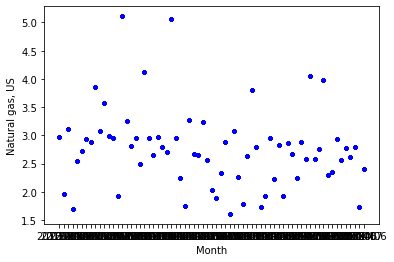

In [ ]:
# Month vs Natural Gas Price Scatterplot
natural_gas_data_df1.plot.scatter(x = "Month", y = "Natural gas, US", s = 10, c = "blue")

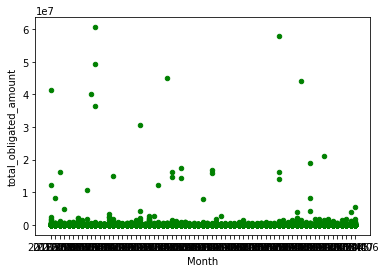

In [ ]:
# Month vs Contract Amounts
natural_gas_data_df1.plot.scatter(x = "Month", y = "total_obligated_amount", c='green')

In [ ]:
# Month vs Contract Amounts
natural_gas_data_df1.dtypes

Month                                   object
naics_description                       object
product_or_service_code_description     object
total_obligated_amount                 float64
recipient_name                          object
funding_sub_agency_name                 object
Natural gas, US                        float64
dtype: object

In [ ]:
natural_gas_data_df1.count()

Month                                  10580
naics_description                      10580
product_or_service_code_description    10580
total_obligated_amount                 10580
recipient_name                         10547
funding_sub_agency_name                10580
Natural gas, US                        10580
dtype: int64

In [ ]:
natural_gas_data_df1.isnull().sum()

Month                                   0
naics_description                       0
product_or_service_code_description     0
total_obligated_amount                  0
recipient_name                         33
funding_sub_agency_name                 0
Natural gas, US                         0
dtype: int64

In [ ]:
#natural_gas_data_df1.plot(x= "Month", y="Natural gas, US")
#plt.show()

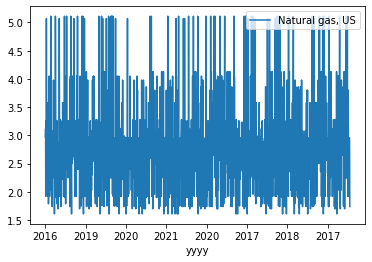

In [ ]:
natural_gas_data_df2.plot(x= "yyyy", y="Natural gas, US")

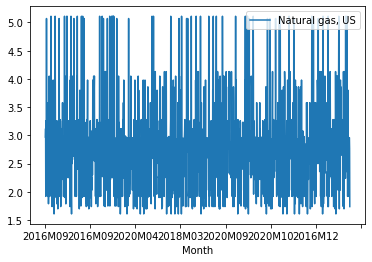

In [ ]:
natural_gas_data_df3.plot(x= "Month", y="Natural gas, US")

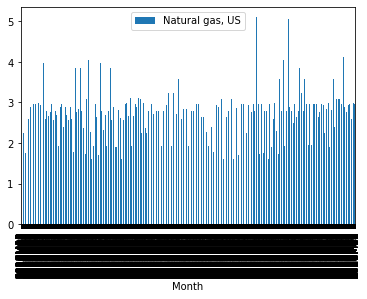

In [ ]:
natural_gas_data_df1.plot.bar(x= "Month", y="Natural gas, US")

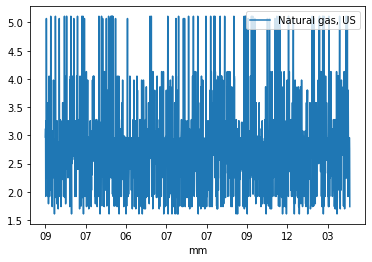

In [ ]:
natural_gas_data_df2.plot(x= "mm", y="Natural gas, US")
# adjust x-axis ticks here/define them / markers would look better in years

In [ ]:
natural_gas_data_df2

,Month,naics_description,product_or_service_code_description,total_obligated_amount,recipient_name,funding_sub_agency_name,"Natural gas, US",mm,yyyy
0,2016M09,NATURAL GAS LIQUID EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,10000.00,"AMERIGAS PROPANE, L.P.",DEPT OF THE NAVY,2.97,09,2016
2,2017M05,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,MAINTENANCE OF FUEL SUPPLY FACILITIES,542491.46,"POND CONSTRUCTORS, INC",DEFENSE LOGISTICS AGENCY,3.12,05,2017
13,2020M09,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,FUEL OILS,6872.28,LAUREL FUEL OIL & HEATING CO INC,PUBLIC BUILDINGS SERVICE,1.92,09,2020
16,2017M01,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,FUEL OILS,6960.00,SLATER OIL COMPANY,INDIAN HEALTH SERVICE,3.26,01,2017
19,2016M10,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,33593.68,"CONSTELLATION NEWENERGY - GAS DIVISION, LLC",DEPT OF THE ARMY,2.95,10,2016
...,...,...,...,...,...,...,...,...,...
10543,2020M12,NATURAL GAS LIQUID EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,98.00,"GIGA, INC.",FEDERAL ACQUISITION SERVICE,2.54,12,2020
10544,2018M06,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,2099.65,MISCELLANEOUS FOREIGN AWARDEES,DEPT OF THE ARMY,2.95,06,2018
10545,2017M07,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,SALVAGE- DEMOLITION OF STRUCTURES/FACILITIES (...,58567.00,"TALIB SYED AND ASSOCIATES, INC.",BUREAU OF LAND MANAGEMENT,2.96,07,2017
10564,2017M12,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,34077.90,"DIRECT ENERGY BUSINESS MARKETING, LLC",DEPT OF THE ARMY,2.76,12,2017


In [ ]:
# Remove 0's & create new DF3
natural_gas_data_df3= natural_gas_data_df2[natural_gas_data_df2['total_obligated_amount']!=0]

In [ ]:
natural_gas_data_df3

,Month,naics_description,product_or_service_code_description,total_obligated_amount,recipient_name,funding_sub_agency_name,"Natural gas, US",mm,yyyy
0,2016M09,NATURAL GAS LIQUID EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,10000.00,"AMERIGAS PROPANE, L.P.",DEPT OF THE NAVY,2.97,09,2016
2,2017M05,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,MAINTENANCE OF FUEL SUPPLY FACILITIES,542491.46,"POND CONSTRUCTORS, INC",DEFENSE LOGISTICS AGENCY,3.12,05,2017
13,2020M09,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,FUEL OILS,6872.28,LAUREL FUEL OIL & HEATING CO INC,PUBLIC BUILDINGS SERVICE,1.92,09,2020
16,2017M01,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,FUEL OILS,6960.00,SLATER OIL COMPANY,INDIAN HEALTH SERVICE,3.26,01,2017
19,2016M10,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,33593.68,"CONSTELLATION NEWENERGY - GAS DIVISION, LLC",DEPT OF THE ARMY,2.95,10,2016
...,...,...,...,...,...,...,...,...,...
10543,2020M12,NATURAL GAS LIQUID EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,98.00,"GIGA, INC.",FEDERAL ACQUISITION SERVICE,2.54,12,2020
10544,2018M06,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,2099.65,MISCELLANEOUS FOREIGN AWARDEES,DEPT OF THE ARMY,2.95,06,2018
10545,2017M07,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,SALVAGE- DEMOLITION OF STRUCTURES/FACILITIES (...,58567.00,"TALIB SYED AND ASSOCIATES, INC.",BUREAU OF LAND MANAGEMENT,2.96,07,2017
10564,2017M12,CRUDE PETROLEUM AND NATURAL GAS EXTRACTION,GASES: COMPRESSED AND LIQUEFIED,34077.90,"DIRECT ENERGY BUSINESS MARKETING, LLC",DEPT OF THE ARMY,2.76,12,2017


In [ ]:
natural_gas_data_df3.to_csv('natural_gas_data_df3.csv')

In [ ]:
# remove total_obligated_amount 0's, by changing 0's to nan, then remove nan rows
#natural_gas_data_df2.replace(0, np.nan, inplace=True)
#natural_gas_data_df2

In [ ]:
# # of 0's in dataframe
count_zeroes_df2 = (natural_gas_data_df2['total_obligated_amount'] == 0).sum()
count_zeroes_df3 = (natural_gas_data_df3['total_obligated_amount'] == 0).sum()
print(count_zeroes_df2)
print(count_zeroes_df3)

198
0


In [ ]:
# Find outliers / create bins

In [ ]:
# contract toals
total_contract_amount = natural_gas_data_df2["total_obligated_amount"].sum()
total_contract_amount

804215367.94

In [ ]:
# agency names
agency_count = natural_gas_data_df2["funding_sub_agency_name"].unique()
agency_count

array(['DEPT OF THE NAVY', 'DEFENSE LOGISTICS AGENCY',
       'PUBLIC BUILDINGS SERVICE', 'INDIAN HEALTH SERVICE',
       'DEPT OF THE ARMY', 'MARITIME ADMINISTRATION',
       'FEDERAL ACQUISITION SERVICE',
       'FEDERAL PRISON SYSTEM / BUREAU OF PRISONS',
       'J. F. KENNEDY CENTER FOR THE PERFORMING ARTS',
       'BUREAU OF LAND MANAGEMENT', 'STATE, DEPARTMENT OF',
       'ENERGY, DEPARTMENT OF', 'VETERANS AFFAIRS, DEPARTMENT OF',
       'DEPT OF THE AIR FORCE', 'U.S. COAST GUARD',
       'AGRICULTURAL RESEARCH SERVICE', 'U.S. FISH AND WILDLIFE SERVICE',
       'BUREAU OF INDIAN AFFAIRS AND BUREAU OF INDIAN EDUCATION',
       'UNITED STATES AGENCY FOR GLOBAL MEDIA, BBG',
       'FEDERAL BUREAU OF INVESTIGATION',
       'BUREAU OF SAFETY AND ENVIRONMENTAL ENFORCEMENT',
       'NATIONAL PARK SERVICE',
       'NATIONAL AERONAUTICS AND SPACE ADMINISTRATION',
       'AGENCY FOR INTERNATIONAL DEVELOPMENT',
       'FEDERAL AVIATION ADMINISTRATION',
       'NATIONAL OCEANIC AND ATMOSPHER

In [ ]:
agency_count = natural_gas_data_df2["funding_sub_agency_name"].value_counts()
agency_count

DEPT OF THE ARMY                                               535
FEDERAL ACQUISITION SERVICE                                    395
DEFENSE LOGISTICS AGENCY                                       176
DEPT OF THE AIR FORCE                                          156
STATE, DEPARTMENT OF                                           122
FEDERAL PRISON SYSTEM / BUREAU OF PRISONS                       94
VETERANS AFFAIRS, DEPARTMENT OF                                 92
DEPT OF THE NAVY                                                72
BUREAU OF LAND MANAGEMENT                                       36
U.S. COAST GUARD                                                29
US GEOLOGICAL SURVEY                                            22
ENERGY, DEPARTMENT OF                                           16
NATIONAL PARK SERVICE                                           16
BUREAU OF SAFETY AND ENVIRONMENTAL ENFORCEMENT                  12
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                 

In [ ]:
# Agency Count DF3
agency_count_df3 = natural_gas_data_df3["funding_sub_agency_name"].value_counts()
agency_count_df3

DEPT OF THE ARMY                                               506
FEDERAL ACQUISITION SERVICE                                    383
DEPT OF THE AIR FORCE                                          133
STATE, DEPARTMENT OF                                           104
FEDERAL PRISON SYSTEM / BUREAU OF PRISONS                       90
VETERANS AFFAIRS, DEPARTMENT OF                                 90
DEFENSE LOGISTICS AGENCY                                        88
DEPT OF THE NAVY                                                68
BUREAU OF LAND MANAGEMENT                                       34
U.S. COAST GUARD                                                29
US GEOLOGICAL SURVEY                                            18
NATIONAL PARK SERVICE                                           16
ENERGY, DEPARTMENT OF                                           12
BUREAU OF SAFETY AND ENVIRONMENTAL ENFORCEMENT                  11
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                 

In [ ]:
# put agencies w/ less than 10 into an 'other' category to clear up labels on charts
#other_adjusted_df = natural_gas_data_df3["funding_sub_agency_name"].replace(['BUREAU OF INDIAN AFFAIRS AND BUREAU OF INDIAN EDUCATION', 'INDIAN HEALTH SERVICE', 'FEDERAL LAW ENFORCEMENT TRAINING CENTER', 'RAILROAD RETIREMENT BOARD', 'U.S. FISH AND WILDLIFE SERVICE', 'NATIONAL OCEANIC AND ATMOSPHERIC ADMINISTRATION', 'INTERNAL REVENUE SERVICE', 'FOREST SERVICE', 'FEDERAL AVIATION ADMINISTRATION', 'FEDERAL PRISON SYSTEM', 'J. F. KENNEDY CENTER FOR THE PERFORMING ARTS', 'U.S. ARMY CORPS OF ENGINEERS - CIVIL PROGRAM FINANCING ONLY', 'NATURAL RESOURCES CONSERVATION SERVICE', 'BUREAU OF INDIAN AFFAIRS', 'NATIONAL INSTITUTES OF HEALTH', 'BUREAU OF RECLAMATION', 'FEDERAL EMERGENCY MANAGEMENT AGENCY', 'UNITED STATES AGENCY FOR GLOBAL MEDIA, BBG', 'CENTERS FOR DISEASE CONTROL AND PREVENTION', 'MARITIME ADMINISTRATION', 'PUBLIC BUILDINGS SERVICE', 'ENVIRONMENTAL PROTECTION AGENCY', 'DRUG ENFORCEMENT ADMINISTRATION', 'BUREAU OF OCEAN ENERGY MANAGEMENT', 'AGENCY FOR INTERNATIONAL DEVELOPMENT', 'CORPORATION FOR NATIONAL AND COMMUNITY SERVICE', 'NATIONAL TRANSPORTATION SAFETY BOARD', 'FEDERAL BUREAU OF INVESTIGATION', 'GAO, EXCEPT COMPTROLLER GENERAL', 'OFFICES, BOARDS AND DIVISIONS', 'AGRICULTURAL RESEARCH SERVICE', 'SMITHSONIAN INSTITUTION'], 
                                                                          #  ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'], inplace=False)


In [ ]:
#other_adjusted_df

In [ ]:
#count_other_adjusted_df = other_adjusted_df.index.value_counts()
#count_other_adjusted_df

In [ ]:
# natural_gas_df3 types
natural_gas_data_df3.dtypes

Month                                   object
naics_description                       object
product_or_service_code_description     object
total_obligated_amount                 float64
recipient_name                          object
funding_sub_agency_name                 object
Natural gas, US                        float64
mm                                      object
yyyy                                    object
dtype: object

In [ ]:
# Other Natural Gas DF Count
agency_other_count_df = other_natural_gas_df["funding_sub_agency_name"].value_counts()
agency_other_count_df

DEPT OF THE ARMY                                  506
FEDERAL ACQUISITION SERVICE                       383
DEPT OF THE AIR FORCE                             133
STATE, DEPARTMENT OF                              104
OTHER                                              95
FEDERAL PRISON SYSTEM / BUREAU OF PRISONS          93
VETERANS AFFAIRS, DEPARTMENT OF                    90
DEFENSE LOGISTICS AGENCY                           88
DEPT OF THE NAVY                                   68
BUREAU OF LAND MANAGEMENT                          34
U.S. COAST GUARD                                   29
US GEOLOGICAL SURVEY                               18
NATIONAL PARK SERVICE                              16
ENERGY, DEPARTMENT OF                              12
BUREAU OF SAFETY AND ENVIRONMENTAL ENFORCEMENT     11
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION      11
Name: funding_sub_agency_name, dtype: int64

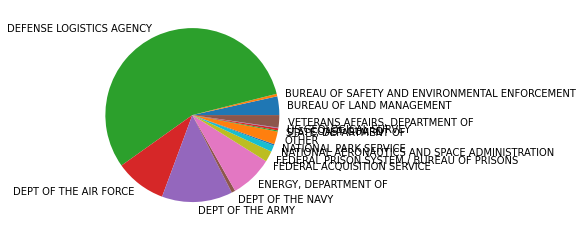

In [ ]:
# pie chart of agency contracts awarded other_natural_gas_df
sums = other_natural_gas_df.groupby(other_natural_gas_df["funding_sub_agency_name"])["total_obligated_amount"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [ ]:
# Other Natural Gas 10 DF Count
agency_other_count_10_df = other_natural_gas_10_df["funding_sub_agency_name"].value_counts()
agency_other_count_10_df

DEPT OF THE ARMY                             506
FEDERAL ACQUISITION SERVICE                  383
OTHER                                        192
DEPT OF THE AIR FORCE                        133
STATE, DEPARTMENT OF                         104
FEDERAL PRISON SYSTEM / BUREAU OF PRISONS     93
VETERANS AFFAIRS, DEPARTMENT OF               90
DEFENSE LOGISTICS AGENCY                      88
DEPT OF THE NAVY                              68
BUREAU OF LAND MANAGEMENT                     34
Name: funding_sub_agency_name, dtype: int64

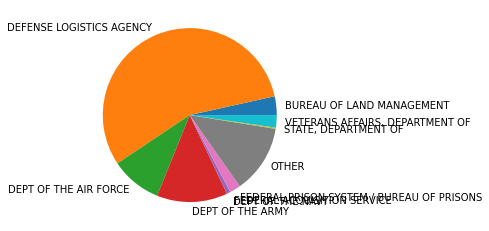

In [ ]:
# pie chart of agency contracts awarded other_natural_gas_10_df
sums = other_natural_gas_10_df.groupby(other_natural_gas_10_df["funding_sub_agency_name"])["total_obligated_amount"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [ ]:
# Other Natural Gas 5 DF Count
agency_other_count_5_df = other_natural_gas_5_df["funding_sub_agency_name"].value_counts()
agency_other_count_5_df

OTHER                          565
DEPT OF THE ARMY               506
FEDERAL ACQUISITION SERVICE    383
DEPT OF THE AIR FORCE          133
STATE, DEPARTMENT OF           104
Name: funding_sub_agency_name, dtype: int64

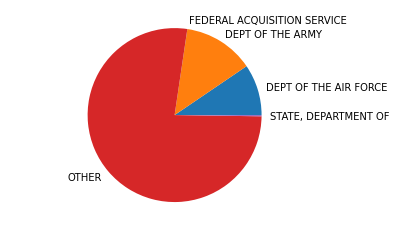

In [ ]:
# pie chart of agency contracts awarded other_natural_gas_5_df
sums = other_natural_gas_5_df.groupby(other_natural_gas_5_df["funding_sub_agency_name"])["total_obligated_amount"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [ ]:
# clean funding_sub_agency_name - repeating same agency name, reordering agency names
# Reorder Veterans Affairs & Dept of State - https://www.askpython.com/python-modules/pandas/update-the-value-of-a-row-dataframe | https://datagy.io/pandas-data-cleaning/
#natural_gas_data_df2["funding_sub_agency_name"] = natural_gas_data_df2["funding_sub_agency_name"].str.replace("VETERANS AFFAIRS, DEPARTMENT OF", "DEPARTMENT OF VETERANS AFFAIRS")
#natural_gas_data_df2.tail()

#natural_gas_data_df2.replace("STATE, DEPARTMENT OF", 
          # "DEPARTMENT OF STATE", 
           #inplace=True)
#natural_gas_data_df2

# clean repeating agency names

In [ ]:
contracts_per_agency = natural_gas_data_df2.set_index(["funding_sub_agency_name"])["total_obligated_amount"]
contracts_per_agency

funding_sub_agency_name
DEPT OF THE NAVY                10000.00
DEFENSE LOGISTICS AGENCY       542491.46
PUBLIC BUILDINGS SERVICE         6872.28
INDIAN HEALTH SERVICE            6960.00
DEPT OF THE ARMY                33593.68
                                 ...    
FEDERAL ACQUISITION SERVICE        98.00
DEPT OF THE ARMY                 2099.65
BUREAU OF LAND MANAGEMENT       58567.00
DEPT OF THE ARMY                34077.90
U.S. COAST GUARD                 6000.00
Name: total_obligated_amount, Length: 1889, dtype: float64

In [ ]:
# Linear Regression
# Independent Variable (X) - contract price      Dependent Variable (Y) - natural gas price US
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on govt contract data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    print(r_value) 
    print(p_value)
    print("this is the r value", r_value)
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('US Govt Contract Value')
    plt.ylabel(y_label)
    plt.show()

  

0.05457365863935613
0.017686709826085348
this is the r value 0.05457365863935613


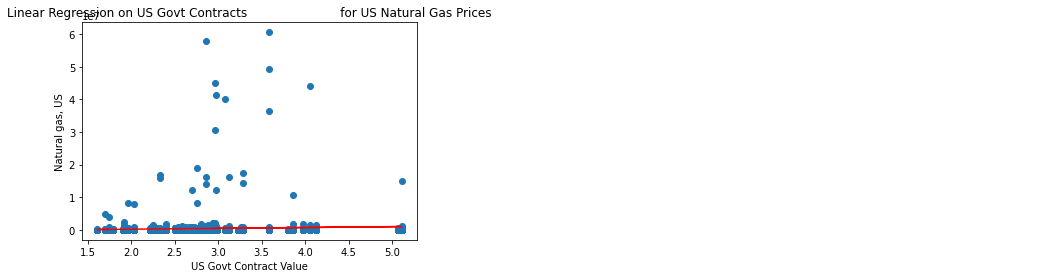

In [ ]:
x_values = natural_gas_data_df2["Natural gas, US"]
y_values = natural_gas_data_df2["total_obligated_amount"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on US Govt Contracts \
                       for US Natural Gas Prices', 'Natural gas, US',(10, 40))

In [ ]:
# summarize dataframe w/ groupby / time / department/recipient | look at source of outliers
# p value not statistically significant | r-value is weak too
# not a strong linear relationship as is | adjust

In [ ]:
# Linear Regression of Army Contracts to US Natural Gas Prices


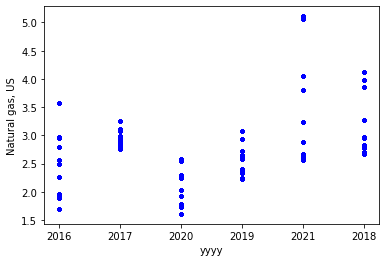

In [ ]:
# Month vs Natural Gas Price Scatterplot
natural_gas_data_df2.plot.scatter(x = "yyyy", y = "Natural gas, US", s = 10, c = "blue")


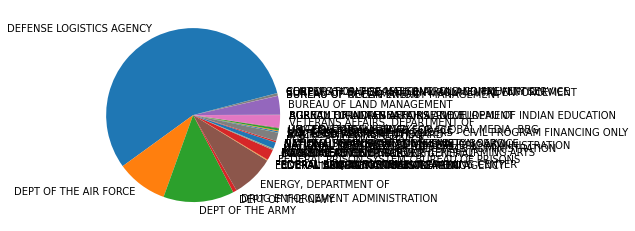

In [ ]:
# pie chart of agency contracts awarded df2
sums = natural_gas_data_df2.groupby(natural_gas_data_df2["funding_sub_agency_name"])["total_obligated_amount"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

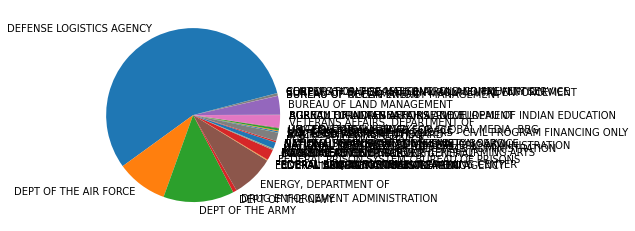

In [ ]:
# pie chart of agency contracts awarded df3
sums = natural_gas_data_df3.groupby(natural_gas_data_df3["funding_sub_agency_name"])["total_obligated_amount"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

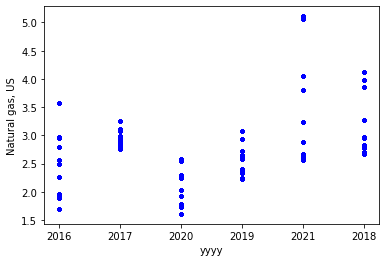

In [ ]:
natural_gas_data_df3.plot.scatter(x = "yyyy", y = "Natural gas, US", s = 10, c = "blue")

0.05802922837428992
0.017009088553353948
this is the r value 0.05802922837428992


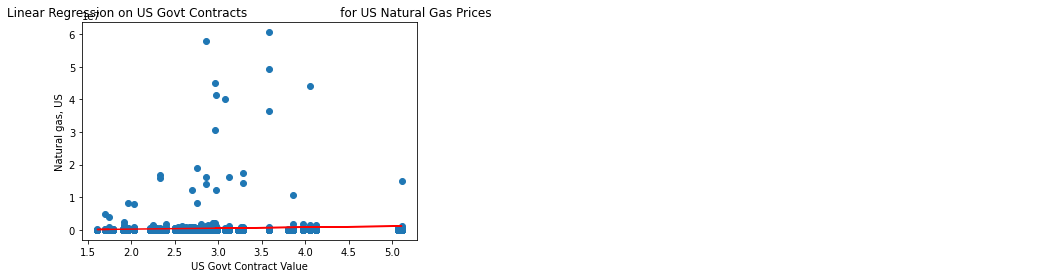

In [ ]:
x_values = natural_gas_data_df3["Natural gas, US"]
y_values = natural_gas_data_df3["total_obligated_amount"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on US Govt Contracts \
                       for US Natural Gas Prices', 'Natural gas, US',(10, 40))